# This project deals with the detection of cancer. 

In [328]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [372]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

In [373]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [331]:
df.shape

(699, 11)

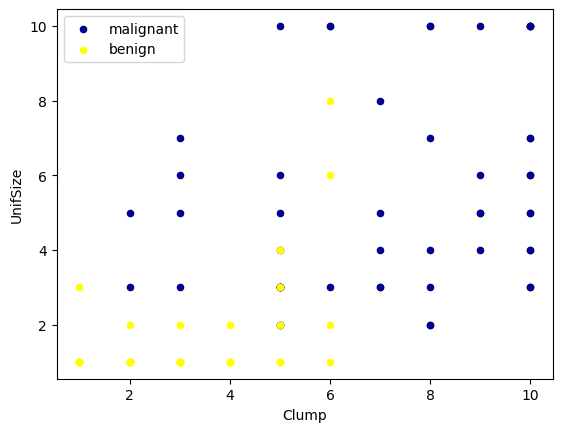

In [332]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [333]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [334]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [335]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = feature_df
X[0:5]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [336]:
X= np.asarray(X)

In [337]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [338]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [339]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Using a Tensorflow model

In [349]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [350]:
X_train.shape

(546, 9)

In [351]:
# create the model
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='linear'))

In [352]:
# summary of the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                640       
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_62 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [353]:
# compilation of model

model.compile(loss='mean_squared_error' ,optimizer='adam')

In [354]:
history= model.fit(X_train,y_train,validation_split = 0.2, epochs = 200)

Epoch 1/200
14/14 [==============================] - 2s 18ms/step - loss: 17.5714 - val_loss: 6.0859
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 5.1723 - val_loss: 2.4700
Epoch 3/200
14/14 [==============================] - 0s 10ms/step - loss: 3.6653 - val_loss: 1.5382
Epoch 4/200
14/14 [==============================] - 0s 15ms/step - loss: 2.8717 - val_loss: 1.5252
Epoch 5/200
14/14 [==============================] - 0s 10ms/step - loss: 2.5025 - val_loss: 1.2968
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 2.5691 - val_loss: 1.2137
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 2.4119 - val_loss: 1.1742
Epoch 8/200
14/14 [==============================] - 0s 5ms/step - loss: 2.2543 - val_loss: 1.1172
Epoch 9/200
14/14 [==============================] - 0s 12ms/step - loss: 1.9817 - val_loss: 1.0026
Epoch 10/200
14/14 [==============================] - 0s 8ms/step - loss: 1.9626 - val_loss: 0.8872
Epo

In [355]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [charges]')
    plt.legend()
    plt.grid(True)

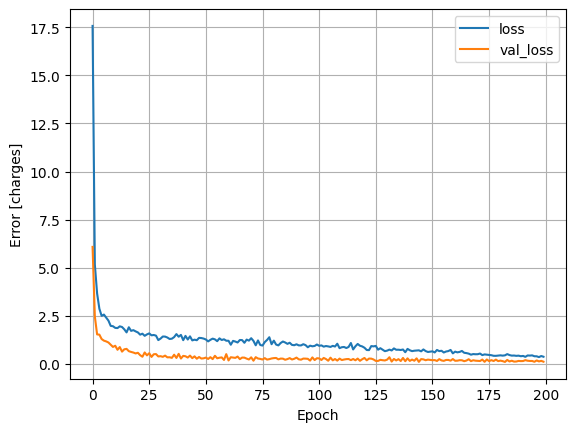

In [356]:
plot_loss(history)

In [357]:
predictions=model.predict(X_test).flatten()
predictions= predictions.round()
predictions

5/5 [==============================] - 0s 2ms/step


array([2., 4., 2., 4., 2., 2., 2., 2., 4., 2., 2., 4., 3., 4., 4., 2., 2.,
       2., 2., 2., 4., 2., 4., 4., 3., 3., 2., 2., 4., 4., 3., 2., 3., 2.,
       2., 2., 4., 2., 2., 2., 2., 2., 2., 3., 4., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 4., 2., 3., 4., 4., 2.,
       2., 2., 4., 4., 2., 2., 2., 4., 2., 2., 3., 4., 2., 2., 2., 2., 3.,
       4., 3., 4., 2., 2., 3., 3., 2., 2., 2., 4., 2., 2., 2., 4., 2., 4.,
       2., 2., 4., 2., 4., 2., 2., 3., 2., 2., 4., 2., 2., 2., 2., 2., 4.,
       4., 4., 3., 4., 2., 2., 4., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2.,
       4.], dtype=float32)

In [358]:
# comparing the predicted values of the model to the actual values
test_values=pd.DataFrame(data={'Actual_values':y_test,'Predictions':predictions})

In [359]:
test_values

,Actual_values,Predictions
0,2,2.0
1,4,4.0
2,2,2.0
3,4,4.0
4,2,2.0
...,...,...
132,2,2.0
133,2,2.0
134,2,2.0
135,2,2.0


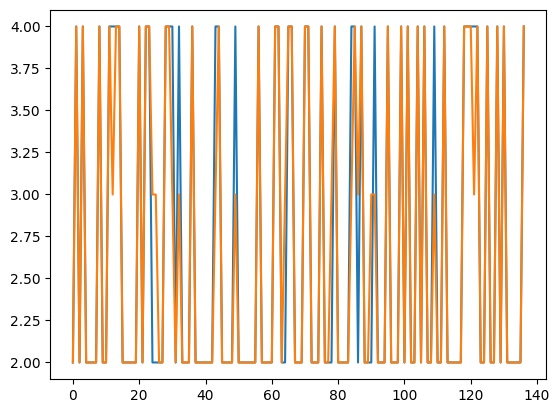

In [360]:
plt.plot(test_values)